In [4]:
%pip install river pandas==2.2.2 scipy==1.13.1 numpy==1.26.1



[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib yfinance scikit-learn scikit-optimize



[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importação de libs auxiliares
import numpy as np
import pandas as pd

# Importando as classes refatoradas
from preprocessamento.SeriesProcessor import SeriesProcessor
from otimizador.Optimizer import OtimizadorModelosSklearn
from avaliacao.AvaliadorDriftBase import AvaliadorBatch
from avaliacao.AvaliadorDriftBase import AvaliadorPassivo
from utils.Visualizer import Visualizer

# limpar o log
import warnings
#warnings.filterwarnings("ignore")

In [7]:
# Importando detectores de drift
from detectores.ADWINDetector import ADWINDetector
from detectores.DDMDetector import DDMDetector
from detectores.EDDMDetector import EDDMDetector
from detectores.FHDDMDetector import FHDDMDetector
from detectores.HDDM_ADetector import HDDM_ADetector
from detectores.PageHinkleyDetector import PageHinkleyDetector
from detectores.HDDM_WDetector import HDDM_WDetector
from detectores.KSWINDetector import KSWINDetector

In [9]:
# Importando modelos offline
from regressores.modelosOffline.LinearRegressionModelo import LinearRegressionModelo
from regressores.modelosOffline.KneighborsRegressorModelo import KNeighborsRegressorModelo
from regressores.modelosOffline.LassoRegressionModelo import LassoRegressionModelo
from regressores.modelosOffline.RidgeRegressionModelo import RidgeRegressionModelo
from regressores.modelosOffline.SVRModelo import SVRModelo
from regressores.modelosOffline.RandomForestModelo import RandomForestModelo
from regressores.modelosOffline.MLPRegressorModelo import MLPRegressorModelo

In [10]:
# Importando modelos online
from regressores.modelosOnline.BayesianLinearRegressionModelo import BayesianLinearRegressionModelo
from regressores.modelosOnline.HoeffdingTreeRegressorModelo import HoeffdingTreeRegressorModelo
from regressores.modelosOnline.KNNRegressorOnlineModelo import KNNRegressorOnlineModelo
from regressores.modelosOnline.LinearRegressionOnlineModelo import LinearRegressionOnlineModelo


In [11]:
# Lista de séries temporais disponíveis
series = [
    "AAPL",
    "B3SA3.SA",
    "^IXIC",
    "^DJI",
    "^GSPC",
    "^BVSP",
    "USDBRL=X"
]


In [12]:
# Definindo parâmetros para processamento
tamanho_batch = 100
lags = 5
serie_escolhida = series[0]
print(f"Processando série: {serie_escolhida}")

Processando série: AAPL


In [13]:
# Baixando os dados da ação
serie_temporal = SeriesProcessor.baixar_dados(serie_escolhida)

# Normalizando a série temporal
serie_temporal = SeriesProcessor.normalizar_serie(serie_temporal)
print(f"Shape da série após normalização: {serie_temporal.shape}")

# Gerando janelas temporais
X, Y = SeriesProcessor.criar_janela_temporal(serie_temporal, lags)
print(f"Shape dos dados de entrada: {X.shape}")
print(f"Shape dos dados de saída: {Y.shape}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Shape da série após normalização: (1257, 1)
Shape dos dados de entrada: (1252, 5)
Shape dos dados de saída: (1252, 1)


In [14]:
arquivo_parametros = "melhores_parametros.json"
otimizador = OtimizadorModelosSklearn(n_iter=20)

In [15]:
melhores_parametros = otimizador.otimizar(
    X[tamanho_batch:],
    Y[tamanho_batch:],
    salvar_em = arquivo_parametros)


/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, False, False] before, using random point [True, True, False]
  warnings.warn(
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, True, True] before, using random point [True, False, False]
  warnings.warn(
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, False, False] before, using random point [True, True, True]
  warnings.warn(
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, False, True] before, using random point [False, True, False]
  warnings.warn(
/home/liedson/.pyenv/versions/3.12.6/lib/p

Melhor para LinearRegression: OrderedDict({'copy_X': False, 'fit_intercept': True, 'positive': True})
Melhor para KNeighborsRegressor: OrderedDict({'n_neighbors': 6, 'p': 1, 'weights': 'distance'})
Melhor para Lasso: OrderedDict({'alpha': 0.0010340016434251915, 'max_iter': 1654, 'tol': 0.0009228497044562662})
Erro com MLPRegressor: Not all points are within the bounds of the space.
Ajustando parâmetros padrão para o MLPRegressor devido a erro.


/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarnin

Melhor para RandomForestRegressor: OrderedDict({'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50})
Melhor para Ridge: OrderedDict({'alpha': 0.010253943538922507, 'solver': 'sparse_cg'})


/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/liedson/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-v

Melhor para SVR: OrderedDict({'C': 98.26319577036952, 'epsilon': 0.01, 'gamma': 0.001, 'kernel': 'linear'})


In [16]:
modelos_offline = [
    LinearRegressionModelo,
    KNeighborsRegressorModelo,
    LassoRegressionModelo,
    MLPRegressorModelo,
    RandomForestModelo,
    RidgeRegressionModelo,
    SVRModelo
]

In [17]:
modelos_online = [
        BayesianLinearRegressionModelo,
        HoeffdingTreeRegressorModelo,
        KNNRegressorOnlineModelo,
        LinearRegressionOnlineModelo
    ]

In [18]:
avaliador = AvaliadorBatch()
predicoes_ativo, deteccoes, mae_ativo = avaliador.executar_avaliacao(X, Y, tamanho_batch, LinearRegressionModelo, DDMDetector)



Drift detectado para KNN_HDDM nos índices: [480, 1081]


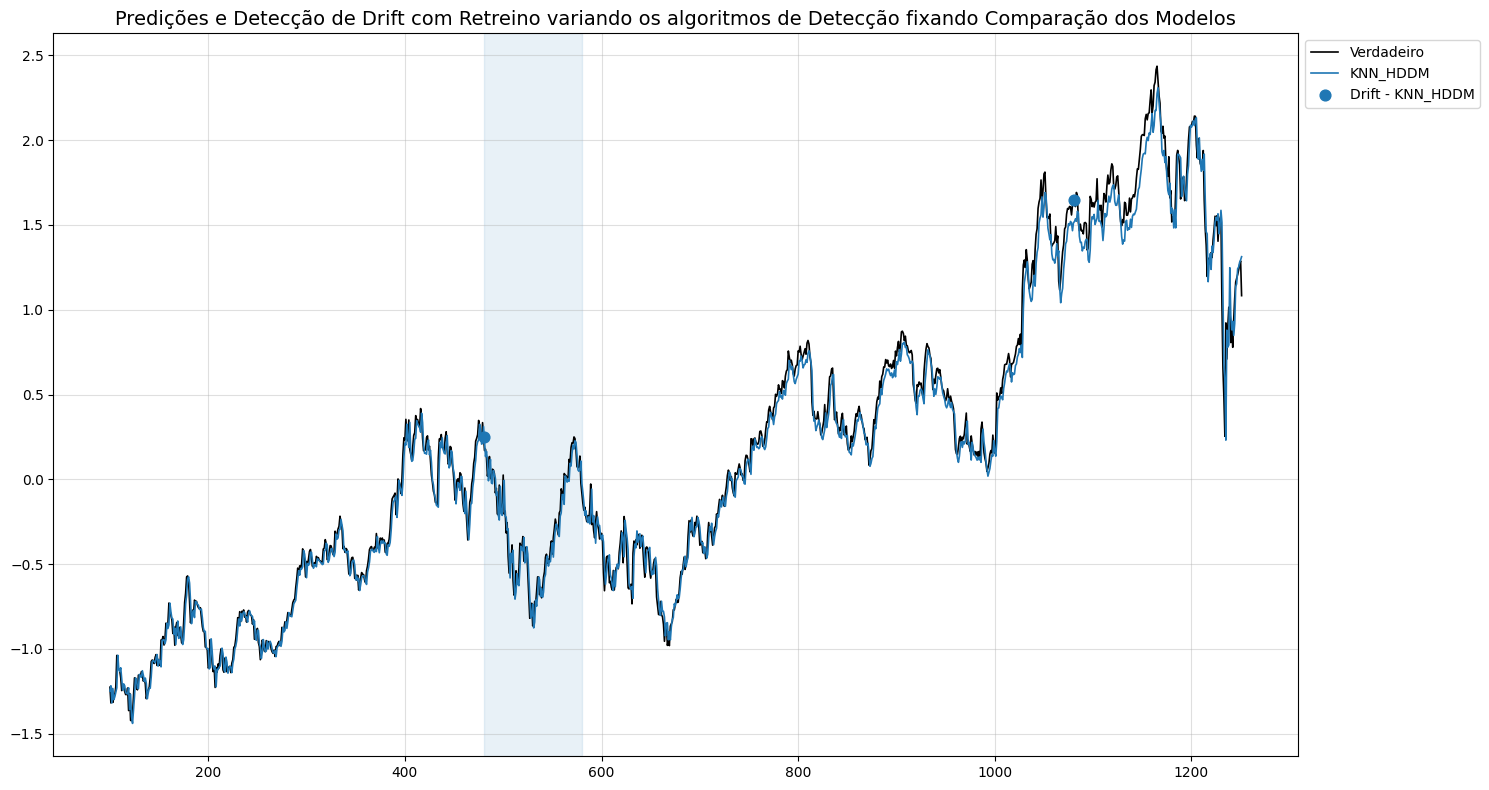

In [19]:
# Plotando os resultados
Visualizer.plotar_resultados_multi(Y,
                  [predicoes_ativo],
                  ["KNN_HDDM"],
                  {"KNN_HDDM": deteccoes},
                  tamanho_batch,
                  detector_or_modelo="Comparação dos Modelos",
                  )

In [20]:
modelos_online = [
        BayesianLinearRegressionModelo,
        HoeffdingTreeRegressorModelo,
        KNNRegressorOnlineModelo,
        LinearRegressionOnlineModelo
    ]


In [21]:
avaliador = AvaliadorPassivo()
predicoes_passivo, mae = avaliador.executar_avaliacao(X, Y, tamanho_batch, BayesianLinearRegressionModelo)



Drift detectado para KNN_HDDM nos índices: [480, 1081]


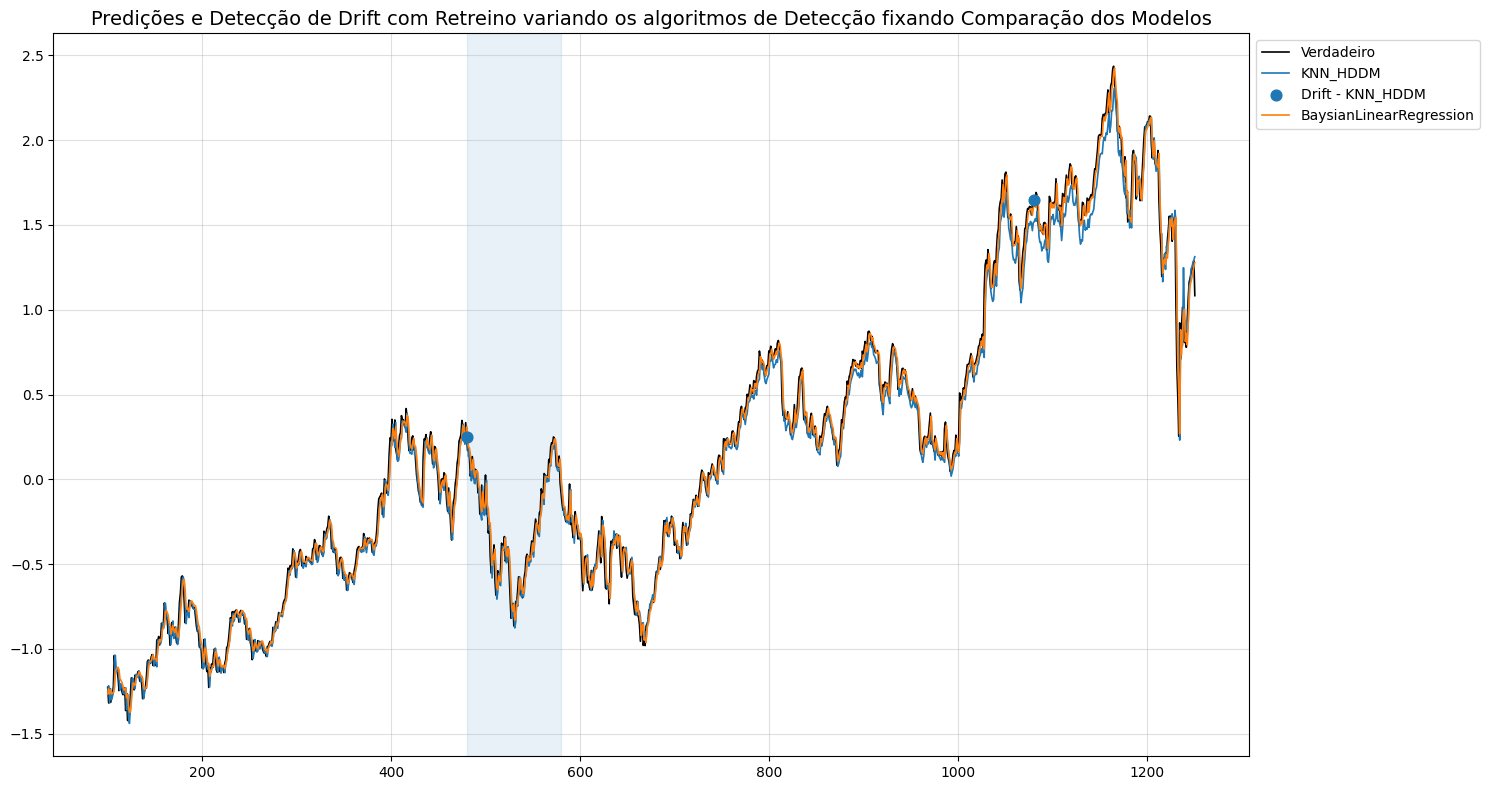

In [22]:
# Plotando os resultados
Visualizer.plotar_resultados_multi(Y,
                  [predicoes_ativo,
                   predicoes_passivo],
                  ["KNN_HDDM",
                   "BaysianLinearRegression"],
                  {"KNN_HDDM": deteccoes},
                  tamanho_batch,
                  detector_or_modelo="Comparação dos Modelos",
                  )